We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('./airlines_passengers.csv')

Let’s display the first five rows of data

In [4]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [5]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [6]:
data['Month'] = pd.to_datetime(data.Month)

The next thing we can do is convert the month column to an index. 


In [7]:
data.set_index('Month', drop=True, inplace = True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

Text(0, 0.5, 'Number of Passengers')

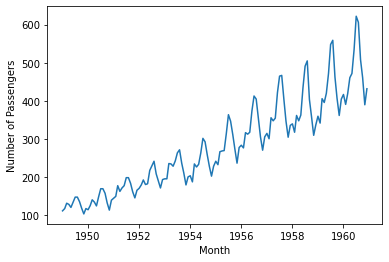

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.lineplot(x = 'Month', y = 'Passengers', data = data, ax = ax)
ax.set_ylabel('Number of Passengers')

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [9]:
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [32]:
result = adfuller(data.Passengers, autolag='AIC')
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

pd.DataFrame([[result[0], result[4]['5%'], result[1]]], columns = ['ADF Test Statistic', '5% Critical Value', 'p-value'], index = ['Results'])

ADF Test Statistic: 0.82
5% Critical Value: -2.88
p-value: 0.99


,ADF Test Statistic,5% Critical Value,p-value
Results,0.815369,-2.884042,0.99188


Store our results in a dataframe display it

Explain the results

In [11]:
# p-value greater than 0.05, we fail to reject the null hypothesis and conclude that the time series is not stationary.

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

In [12]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
acf_50 = acf(data.Passengers, nlags=50)
acf_50

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092, 0.13840041, 0.11140324, 0.09098453, 0.08217177,
       0.08877222, 0.10386958, 0.12393082, 0.13263456, 0.10374723,
       0.06209805])

Calculate partial autocorrelation

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


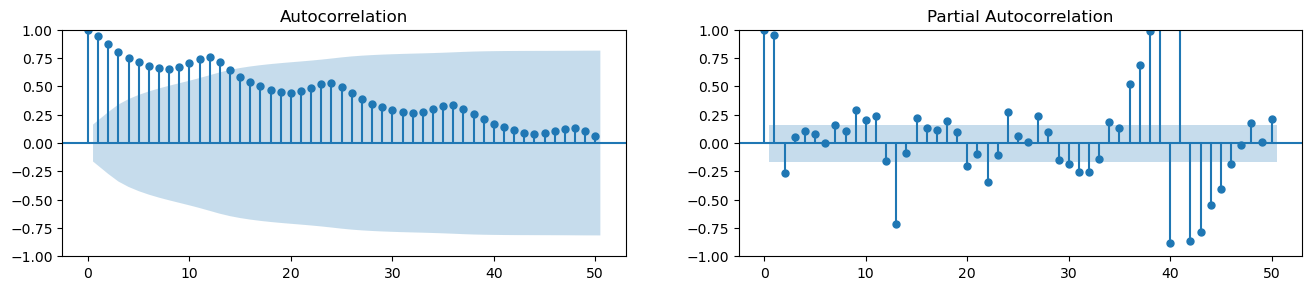

In [13]:
# Calculate ACF and PACF upto 50 lags
pacf_50 = pacf(data.Passengers, nlags=50)

# Draw Plots
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data.Passengers.tolist(), lags=50, ax=axes[0])
plot_pacf(data.Passengers.tolist(), lags=50, ax=axes[1])

plt.show()

In [14]:
#Code for Durbin Watson test
import statsmodels.api as sm

X = np.arange(len(data))
Y = np.asarray(data)
X = sm.add_constant(X)

from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

# Fit the ordinary least square method.
ols_res = OLS(Y,X).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

0.5371938961768885

In [15]:
# DW close to 0 so positive auto-correlation.

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


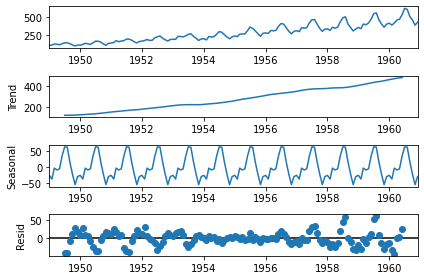

In [17]:
decompose = seasonal_decompose(data, model = 'additive')
decompose.plot()
plt.show()


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [18]:
# Add column with stationary series (based on difference vs. 2nd previous observation)
data_stationary = data.diff(2)
data_stationary.dropna(inplace = True)
data_stationary.index = pd.to_datetime(data_stationary.index)
result = adfuller(data_stationary, autolag='AIC')
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.3f' % result[1])
# p-value is 0.05 (ADF below 5% critical value), stationary

ADF Test Statistic: -2.96
5% Critical Value: -2.88
p-value: 0.039


In [19]:
from statsmodels.tsa.arima.model import ARIMA

MA(1)

In [20]:
model_ma1 = ARIMA(data_stationary, order = (0,0,1))
results_ma1 = model_ma1.fit()

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Display the output

In [21]:
print(results_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  142
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -703.526
Date:                Tue, 29 Mar 2022   AIC                           1413.053
Time:                        14:28:07   BIC                           1421.920
Sample:                    03-01-1949   HQIC                          1416.656
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4194      5.760      0.767      0.443      -6.871      15.709
ma.L1          0.9988      0.918      1.088      0.277      -0.800       2.798
sigma2      1138.2710   1049.671      1.084      0.2

MA(2)

In [22]:
model_ma2 = ARIMA(data_stationary, order = (0,0,2))
results_ma2 = model_ma2.fit()

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Display the output

In [23]:
print(results_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  142
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -694.630
Date:                Tue, 29 Mar 2022   AIC                           1397.260
Time:                        14:28:07   BIC                           1409.084
Sample:                    03-01-1949   HQIC                          1402.065
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7876      7.466      0.641      0.521      -9.846      19.421
ma.L1          1.3957      4.824      0.289      0.772      -8.059      10.851
ma.L2          0.3958      1.882      0.210      0.8

AR(2)

In [24]:
model_ar2 = ARIMA(data_stationary, order = (2,0,0))
results_ar2 = model_ar2.fit()
print(results_ar2.summary())

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  142
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -710.349
Date:                Tue, 29 Mar 2022   AIC                           1428.698
Time:                        14:28:07   BIC                           1440.521
Sample:                    03-01-1949   HQIC                          1433.502
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8277      5.811      0.831      0.406      -6.562      16.217
ar.L1          0.9204      0.077     11.897      0.000       0.769       1.072
ar.L2         -0.5886      0.072     -8.224      0.0

ARMA (?,?)

In [25]:
model_arma22 = ARIMA(data_stationary, order = (2,0,2))
results_arma22 = model_arma22.fit()
print(results_arma22.summary())

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  142
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -674.048
Date:                Tue, 29 Mar 2022   AIC                           1360.097
Time:                        14:28:07   BIC                           1377.832
Sample:                    03-01-1949   HQIC                          1367.304
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3360      0.311     17.184      0.000       4.727       5.945
ar.L1          1.1031      0.068     16.287      0.000       0.970       1.236
ar.L2         -0.5089      0.080     -6.325      0.0

Display the output

ARIMA(?,?)

In [26]:
data.index = pd.to_datetime(data.index)
model_arima212 = ARIMA(data, order = (2,1,2)) # No need to take data_stationary as ARIMA will make the data stationary
results_arima212 = model_arima212.fit()
print(results_arima212.summary())

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 29 Mar 2022   AIC                           1353.347
Time:                        14:28:07   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.058      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.776      0.0

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [27]:
from sklearn.metrics import mean_squared_error

models = {
    'MA(1)': results_ma1,
    'MA(2)': results_ma2,
    'AR(2)': results_ar2,
    'ARMA(2,2)': results_arma22,
    'ARIMA(2,1,2)': results_arima212
}

for model_name, results in models.items():
    if not ('ARIMA' in model_name):
        print(f'{model_name}: {mean_squared_error(y_true = data_stationary, y_pred = results.predict(), squared=False)}')
    else:
        print(f'{model_name}: {mean_squared_error(y_true = data, y_pred = results.predict(), squared=False)}')

MA(1): 33.943796104356096
MA(2): 31.774486454392616
AR(2): 35.85364793689341
ARMA(2,2): 27.30424295067863
ARIMA(2,1,2): 27.64308886507173


Calculate AIC

In [28]:
for model_name, results in models.items():
    print(f'{model_name}: {results.aic}')

MA(1): 1413.052694407416
MA(2): 1397.2601970187839
AR(2): 1428.6976114859976
ARMA(2,2): 1360.096841528153
ARIMA(2,1,2): 1353.3466399608433


In [29]:
# ARMA(2,2) and ARIMA(2,1,2) are the best models here: lowest RMSE and AIC.
# We note that our own data transformation (to make it stationary) is slightly more efficient than the one in ARIMA.

In [30]:
# Using auto_arima with seasonality

import pmdarima as pm
model = pm.arima.auto_arima(data, trace = True, error_action='ignore', suppress_warnings=True, seasonal = True, m=12)
model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.10 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.47 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.12 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.39 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.11 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.36 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.30 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.61 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.03 sec
 ARIMA(3,1,1)(0,1,0

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [31]:
# Using auto_arima without seasonality

model = pm.arima.auto_arima(data, trace = True, error_action='ignore', suppress_warnings=True)
model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)